In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
# Function to Read crypto Data - using the yfinance package
def get_crypto_data(crypto_symbol):
    # Calculate start and end dates
    end_date = datetime.today()
    start_date = end_date - timedelta(days=20*365)  # Approximation for 10 years
    
    # Fetch data using yfinance
    data = yf.download(f"{crypto_symbol}-USD", start=start_date, end=end_date)
    
    return data

In [3]:
BTC = get_crypto_data("BTC")

[*********************100%***********************]  1 of 1 completed


C:\Users\spsk9\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [4]:
BTC['ret']= BTC['Adj Close'].pct_change()

In [5]:
BTC.head()

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024659


In [6]:
GLD = yf.download("GLD", start='2014-09-17',end=datetime.today())

[*********************100%***********************]  1 of 1 completed


C:\Users\spsk9\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [7]:
GLD['ret']= GLD['Adj Close'].pct_change()

In [8]:
GLD.head()

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2014-09-17,118.949997,119.239998,117.500000,117.540001,117.540001,8328700,NaN
2014-09-18,117.410004,118.089996,117.190002,117.779999,117.779999,5368700,0.002042
2014-09-19,117.510002,117.570000,116.720001,117.089996,117.089996,10930200,-0.005858
2014-09-22,116.720001,117.370003,116.580002,116.849998,116.849998,7601600,-0.002050
2014-09-23,117.989998,117.989998,117.309998,117.599998,117.599998,4664800,0.006418


In [9]:
# Merge the two dataframes on the Date index
returns = pd.merge(BTC[['ret']], GLD[['ret']], left_index=True, right_index=True, suffixes=('_BTC', '_GLD'))

# Rename the columns to BTC_ret and GLD_ret
returns.rename(columns={'ret_BTC': 'BTC_ret', 'ret_GLD': 'GLD_ret'}, inplace=True)

# Display the resulting dataframe
returns.head()

,BTC_ret,GLD_ret
Date,,
2014-09-17,NaN,NaN
2014-09-18,-0.071926,0.002042
2014-09-19,-0.069843,-0.005858
2014-09-22,0.008352,-0.002050
2014-09-23,0.083647,0.006418


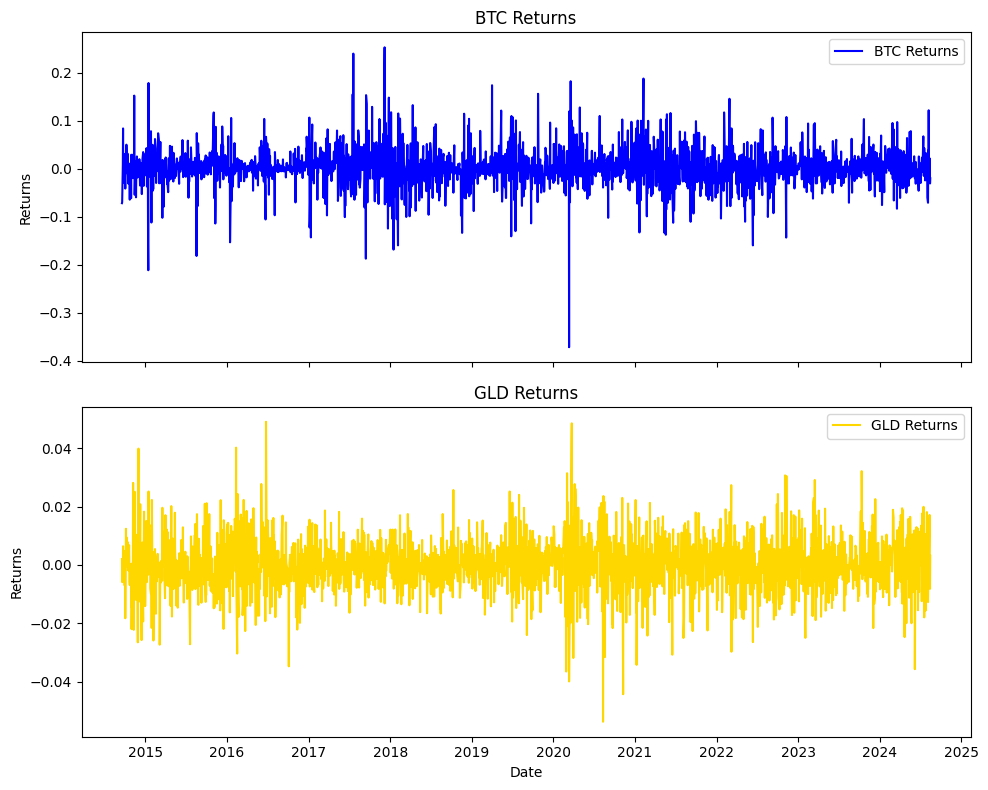

In [10]:
# Create a figure and two subplots (one for each DataFrame)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot BTC returns
ax1.plot(returns.index, returns['BTC_ret'], label='BTC Returns', color='blue')
ax1.set_title('BTC Returns')
ax1.set_ylabel('Returns')
ax1.legend()

# Plot GLD returns
ax2.plot(returns.index, returns['GLD_ret'], label='GLD Returns', color='gold')
ax2.set_title('GLD Returns')
ax2.set_ylabel('Returns')
ax2.legend()

# Set common labels
ax2.set_xlabel('Date')

# Tight layout to improve spacing between plots
plt.tight_layout()

# Display the plot
plt.show()

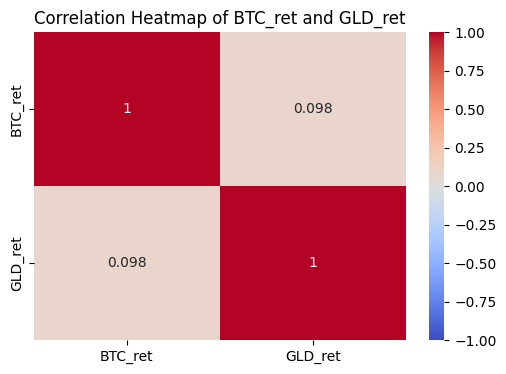

In [14]:
# Compute the correlation matrix
correlation_matrix = returns.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title to the heatmap
plt.title('Correlation Heatmap of BTC_ret and GLD_ret')

# Show the plot
plt.show()


In [15]:
print(correlation_matrix)

          BTC_ret   GLD_ret
BTC_ret  1.000000  0.098039
GLD_ret  0.098039  1.000000
